In [1]:
import reboundx
import rebound

In [2]:
import mesa_reader as mr
from matplotlib import pyplot as plt
import numpy as np
import scipy.interpolate as interp
from mpmath import mp, mpmathify

In [394]:
b = mr.MesaData('./M1_2.21q0.8P6.0Z0.014_binary_history.data')
s = mr.MesaData('./M1_2.21q0.8P6.0Z0.014_history.data')

In [395]:
age = b.data('age')
star_2_mass= b.data('star_2_mass')
star_1_mass= b.data('star_1_mass')
binary_separation = b.data('binary_separation')
mdot_transfer=b.data('lg_mtransfer_rate')
lg_mstar_dot_1=b.data('lg_mstar_dot_1')

In [396]:
age = np.longdouble(age)
star_1_mass = np.longdouble(star_1_mass)
star_2_mass = np.longdouble(star_2_mass)

In [397]:
a= 3080
b=4800
age = np.delete(age,np.arange(a,b))
star_1_mass = np.delete(star_1_mass,np.arange(a,b))
star_2_mass = np.delete(star_2_mass,np.arange(a,b))
binary_separation = np.delete(binary_separation,np.arange(a,b))

lg_mstar_dot_1=np.delete(lg_mstar_dot_1,np.arange(a,b))

In [398]:
dt = []
for i in range(len(age)-1):
    dt.append(age[i+1]-age[i])

In [399]:
m1 = interp.interp1d(age,star_1_mass)
m2 = interp.interp1d(age,star_2_mass)
a = interp.interp1d(age,binary_separation)
mdot1 = interp.interp1d(age,lg_mstar_dot_1)

1.1920928955078125e-07

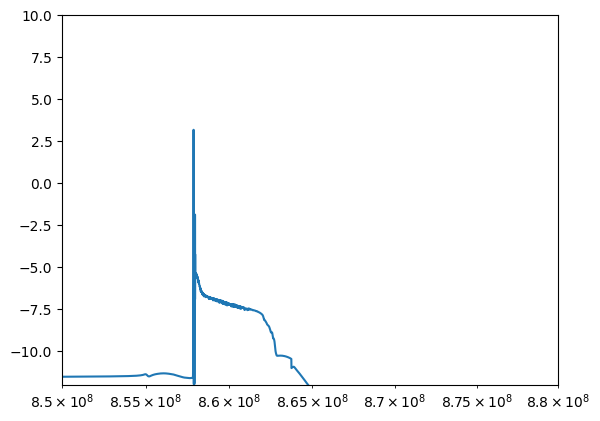

In [400]:
plt.plot(age,lg_mstar_dot_1)

plt.xscale('log')
#plt.yscale('log')
plt.ylim(-12,10)
plt.xlim(8.5e8,8.8e8)
min(dt)

(1.6, 2.2)

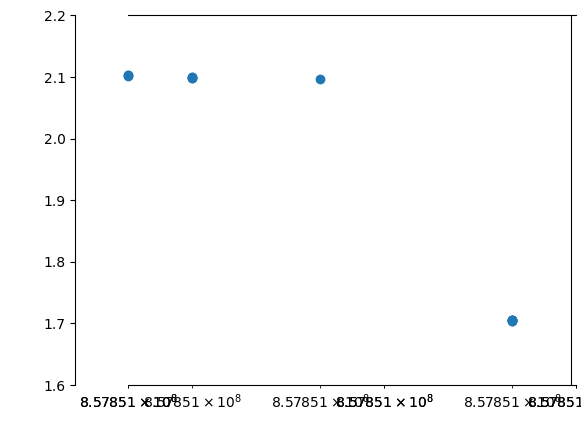

In [401]:
plt.scatter(age,star_1_mass)
plt.xscale('log')
plt.xlim(857850986.11577,857850986.11579)
plt.ylim(1.6,2.2)

In [70]:
age[3100],age[3099]

(857850986.11577904224, 857850986.11577892303)

In [13]:
index_mdot=np.where(lg_mstar_dot_1>-6)

In [14]:
def fun(data):
    return np.split(data, np.where(np.diff(data) != 1)[0]+1)

In [15]:
index_group = fun(index_mdot[0])

In [16]:
age[1296]-age[9964],age[10692]-age[9964],age[13923]-age[13921]

(-87734.28006148338318, 6.614145517349243164, 29760.833973050117493)

In [17]:
index_group[0],index_group[1]

(array([1296, 1297, 1298, ..., 8262, 8263, 8264]),
 array([ 8992,  8993,  8994, ..., 11396, 11397, 11398]))

In [59]:
t_initial =  age[index_group[0][0]]-1e5
#t_initial = 9e8
m1_iniital = m1(t_initial)
m2_iniital = m2(t_initial)
a_initial= a(t_initial) * 0.00465047

In [323]:
def makesim():
  sim = rebound.Simulation()        # create simulation object
  sim.units = ('yr', 'AU', 'Msun')  # set sim units
  sim.add(m=m1_iniital)                     # add Sun (1 Msun)
  sim.add(m=m2_iniital,a=a_initial)                    
  sim.add(a=1.)
  #sim.integrator = 'ias15'#whfast ,ias15     # set integrator
  sim.integrator = "mercurius"
  sim.ri_mercurius.hillfac = 4.
  sim.move_to_com()
  #sim.dt = 0.001
  return sim

In [324]:
import numpy as np
import matplotlib.pyplot as plt

sim = makesim()                     # initialize sim
ps = sim.particles                  # retrieve array of particle objects
Nout = 1000             
times = np.linspace(0, 1e5, Nout)   # Nout evenly spaced intervals from 0 to 10K
a_e = np.zeros(Nout)                  # array for Earth's semi-major axis
E0 = sim.energy()

m1_interp = m1(times+t_initial)
m2_interp = m2(times+t_initial)
a_interp = a(times+t_initial) * 0.00465047

In [ ]:
m2_interp,m2_iniital

In [231]:
%%time
for i, t in enumerate(times):       # loop through times
  sim.integrate(t) # advance sim to next output time
  sim.status()
  #ps[0].m = starmass.interpolate(rebx, t) # interpolate & update Sun's mass
  #ps[0].m = m1_interp[i]
  #ps[1].m = m2_interp[i]
  #ps[1].a = a_interp[i]
  a_e[i] = ps[2].a                    # store Earth's current semi-major axis
sim.status()
plt.plot(times, a_e)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.2, 4)
plt.show()

---------------------------------
REBOUND version:     	3.25.1
REBOUND built on:    	Jul  3 2023 09:34:38
Number of particles: 	3
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7fc6a0bf1950, m=2.207110248362523 x=-0.0450052679542766 y=0.0 z=0.0 vx=0.0 vy=-17.52219934875457 vz=0.0>
<rebound.particle.Particle object at 0x7fc6a0fb1170, m=1.7686730276546214 x=0.05616164580963031 y=0.0 z=0.0 vx=0.0 vy=21.865785903780576 vz=0.0>
<rebound.particle.Particle object at 0x7fc6a0bf1950, m=0.0 x=0.9999999999999999 y=0.0 z=0.0 vx=0.0 vy=12.528036711897606 vz=0.0>
---------------------------------
---------------------------------
REBOUND version:     	3.25.1
REBOUND built on:    	Jul  3 2023 09:34:38
Number of particles: 	3
Selected integrator: 	mercurius
Simulation time:     	1.0010010010010011e+02
Current timestep:    	0.001000
---------------------------------
<reb

KeyboardInterrupt: 

In [18]:
age[index_group[0]]-age[index_group[0]][0]

array([  0.        ,  37.69155753,  67.84480333, ..., 867.33182299,
       867.35583663, 867.38465285])

In [332]:
t_initial =  age[index_group[0][0]]
m1_iniital = m1(t_initial)
m2_iniital = m2(t_initial)
a_initial= a(t_initial) * 0.00465047

def makesim():
  sim = rebound.Simulation()        # create simulation object
  sim.units = ('yr', 'AU', 'Msun')  # set sim units
  sim.add(m=m1_iniital)                     # add Sun (1 Msun)
  sim.add(m=m2_iniital,a=a_initial)                    
  sim.add(a=0.3)
  #sim.integrator = 'whfast'#whfast ,ias15, BS     # set integrator
  sim.integrator = "ias15"#"mercurius"
  #sim.ri_mercurius.hillfac = 4.
  #sim.ri_bs.eps_rel = 1e-14
  #sim.ri_bs.eps_abs = 1e-14
  sim.move_to_com()
  #sim.dt = 0.001
  return sim

sim = makesim()                     # initialize sim
ps = sim.particles                  # retrieve array of particle objects
#Nout = 1000              
#times = np.linspace(0, 1e3, Nout)         
times = age[index_group[0]]-t_initial
Nout = len(times)
a_e = np.zeros(Nout)
m1_interp = m1(times+t_initial)
m2_interp = m2(times+t_initial)
a_interp = a(times+t_initial) * 0.00465047

In [333]:
def add_average_between_elements(arr):
    result = []
    for i in range(len(arr) - 1):
        result.append(arr[i])
        average = (arr[i] + arr[i+1]) / 2.0
        result.append(average)
    result.append(arr[-1])  # Add the last element of the original array
    return result
new_times = add_average_between_elements(times)
new_times5 = add_average_between_elements(new_times)
new_times4 = add_average_between_elements(new_times5)
new_times3 = add_average_between_elements(new_times4)
new_times2 = add_average_between_elements(new_times3)
new_times0 = add_average_between_elements(new_times2)
new_times1 = add_average_between_elements(new_times3)
#new_times1 = times

In [334]:

a_e = np.zeros(len(new_times1))
m1_interp = m1(new_times1+t_initial)
m2_interp = m2(new_times1+t_initial)
a_interp = a(new_times1+t_initial) * 0.00465047

---------------------------------
REBOUND version:     	3.25.1
REBOUND built on:    	Jul  3 2023 09:34:38
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	8.6738466183721937e+02
Current timestep:    	0.000304
---------------------------------
<rebound.particle.Particle object at 0x7f827edce0e0, m=1.6266630584338857 x=-24.72587510461301 y=-32.98430655805831 z=0.0 vx=-1.1907480414464446 vy=-21.973149153152892 vz=0.0>
<rebound.particle.Particle object at 0x7f827edc5ef0, m=1.7764257839541635 x=-24.625804423342757 y=-32.98381194780841 z=0.0 vx=-4.499037832577891 vy=12.622073882885477 vz=0.0>
<rebound.particle.Particle object at 0x7f827edce0e0, m=0.0 x=-26.06674679279584 y=-33.13359528222061 z=0.0 vx=-3.0537191318388097 vy=-9.771059214386705 vz=0.0>
---------------------------------


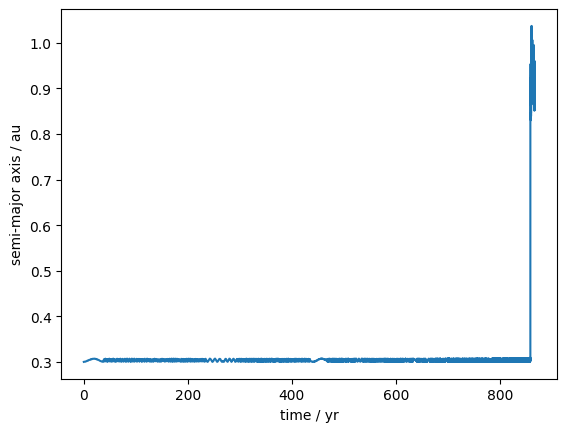

CPU times: user 17.3 s, sys: 40 ms, total: 17.4 s
Wall time: 17.4 s


0.8532627826315281

In [335]:
%%time
for i, t in enumerate(new_times1):
  #print(sim.energy())
  sim.integrate(t,exact_finish_time=0) # advance sim to next output time
  #sim.status()
  #print(sim.energy())
  #ps[0].m = starmass.interpolate(rebx, t) # interpolate & update Sun's mass
  ps[0].m = m1_interp[i]
  ps[1].m = m2_interp[i]
  ps[1].a = a_interp[i]
  a_e[i] = ps[2].a                    # store Earth's current semi-major axis
sim.status()
plt.plot(new_times1, a_e)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.2, 4)
plt.show()
ps[2].a

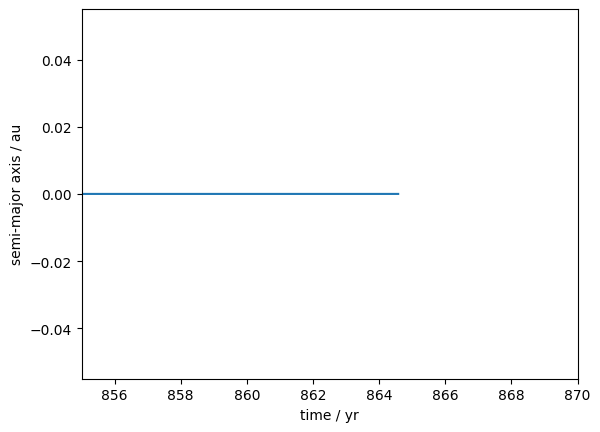

In [121]:
plt.plot(new_times1, a_e)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
plt.xlim(855,870)
plt.show()

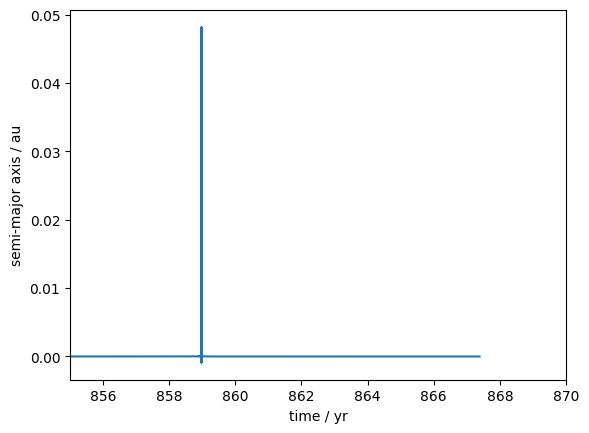

In [98]:
plt.plot(new_times1, dm)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
plt.xlim(855,870)
plt.show()

In [97]:
dm = []
for i in range(len(m1_interp)):
    if i == 0:
        dm.append(0)
    else:
        dm.append(m1_interp[i-1]-m1_interp[i])
dtimes = []
for i in range(len(m1_interp)):
    if i == 0:
        dtimes.append(0)
        
    else:
        dtimes.append(new_times1[i]-new_times1[i-1])

In [80]:
len(new_times1),len(dm),times

(55745,
 55745,
 array([  0.        ,  37.69155753,  67.84480333, ..., 867.33182299,
        867.35583663, 867.38465285], dtype=float128))

In [24]:
mindm = 1e-3

In [25]:
n = int(max(dm)/mindm+1)
n

367

In [81]:
np.where(np.array(dm)>0.01)

(array([14425, 14426, 14427, 14428, 14429, 14430, 14431, 14432]),)

In [83]:
m1_interp[14425],m1_interp[14426],m1_interp[14427],m1_interp[14428],m1_interp[14429],m1_interp[14430],m1_interp[14431],m1_interp[14432]

(2.0425799626213907434,
 1.9943638121314295475,
 1.9461476616414683516,
 1.8979315111515071557,
 1.8497153606615459598,
 1.8014992101715847639,
 1.753283059681623568,
 1.7050669091916623721)

In [84]:
new_times1[14425],new_times1[14426],new_times1[14427]

(858.9757991284132004, 858.9758000075817108, 858.97580088675022125)

In [85]:
[new_times1[14425]+t_initial, new_times1[14426]+t_initial]

[857850986.1157798022, 857850986.1157806814]

In [86]:
np.arange(variable_range[0], variable_range[1], 1e-7)

array([8.57850986e+08, 8.57850986e+08, 8.57850986e+08, 8.57850986e+08,
       8.57850986e+08, 8.57850986e+08, 8.57850986e+08, 8.57850986e+08,
       8.57850986e+08], dtype=float128)

In [363]:
tt = np.linspace(new_times1[14425],new_times1[14425+1],n)

In [369]:
m1(tt+t_initial)

array([2.04503163, 2.03849385, 2.03849385, 2.03849385, 2.03849385,
       2.03849385, 2.03849385, 2.03849385, 2.03195607, 2.03195607,
       2.03195607, 2.03195607, 2.03195607, 2.03195607, 2.03195607,
       2.02541828, 2.02541828, 2.02541828, 2.02541828, 2.02541828,
       2.02541828, 2.02541828, 2.02541828, 2.0188805 , 2.0188805 ,
       2.0188805 , 2.0188805 , 2.0188805 , 2.0188805 , 2.0188805 ,
       2.01234272, 2.01234272, 2.01234272, 2.01234272, 2.01234272,
       2.01234272, 2.01234272, 2.00580493, 2.00580493, 2.00580493,
       2.00580493, 2.00580493, 2.00580493, 2.00580493, 1.99926715,
       1.99926715, 1.99926715, 1.99926715, 1.99926715, 1.99926715,
       1.99926715, 1.99272937, 1.99272937])

In [87]:
variable_range=[0,0]

In [88]:
variable_range[0],variable_range[1] = new_times1[14425]+t_initial, new_times1[14426]+t_initial

In [301]:
n = (m1(variable_range[0]) - m1(variable_range[1]))/1e-3
n = int(n)+1

In [302]:
np.linspace(m1(variable_range[0]), m1(variable_range[1]), n)

array([2.04257996, 2.04157546, 2.04057096, 2.03956645, 2.03856195,
       2.03755745, 2.03655294, 2.03554844, 2.03454394, 2.03353943,
       2.03253493, 2.03153043, 2.03052592, 2.02952142, 2.02851692,
       2.02751242, 2.02650791, 2.02550341, 2.02449891, 2.0234944 ,
       2.0224899 , 2.0214854 , 2.02048089, 2.01947639, 2.01847189,
       2.01746738, 2.01646288, 2.01545838, 2.01445387, 2.01344937,
       2.01244487, 2.01144037, 2.01043586, 2.00943136, 2.00842686,
       2.00742235, 2.00641785, 2.00541335, 2.00440884, 2.00340434,
       2.00239984, 2.00139533, 2.00039083, 1.99938633, 1.99838182,
       1.99737732, 1.99637282, 1.99536832, 1.99436381], dtype=float128)

In [245]:
2.04257996 - 2.03722261

0.005357349999999705

In [231]:
np.arange(variable_range[0], variable_range[1], 1e-2)

array([8.57850986e+08], dtype=float128)

In [295]:
from scipy.optimize import minimize

def objective_func(var):
    return abs(m1(var) - target_value)

# Set the target function value
target_value = 2.01579321
initial_guess = 857850986.11578059196
# Perform optimization
desired_precision = 857850986.1157820374
tolerance = 1 / desired_precision

options = {'ftol': 0.001}
# Perform optimization
result = minimize(objective_func, initial_guess, method = 'Powell',options=options)
# Extract the variable that corresponds to the target function value
variable = result.x
mp.dps = 19
variable = mpmathify(variable[0])
print("Variable:", variable,result)

Variable: 857850986.1157802906    direc: array([[-2.87983825e-10]])
     fun: array(3.57046625e-07, dtype=float128)
 message: 'Optimization terminated successfully.'
    nfev: 75
     nit: 2
  status: 0
 success: True
       x: array([8.57850986e+08], dtype=float128)


In [296]:
np.longfloat(variable)

857850986.11578023434

In [297]:
m1(np.longfloat(variable))

array(2.0188805, dtype=float128)

In [28]:
m1(variable_range[0]) - m1(variable_range[1])

0.004171590333414521

In [442]:
def add_average_between_elements(arr):
    result = []
    for i in range(len(arr) - 1):
        result.append(arr[i])
        average = (arr[i] + arr[i+1]) / 2.0
        if m1(arr[i]) - m1(average)  > 1e-3:
                    
            result.append(average)
    result.append(arr[-1])  # Add the last element of the original array
    return result

In [436]:
i=14425
m1((new_times1+t_initial)[i])-m1(((new_times1+t_initial)[i+1]+(new_times1+t_initial)[i])/2)

0.026151132469131255

In [439]:
len(new_times1+t_initial)

55745

In [ ]:
t = add_average_between_elements(t)

In [470]:
len(t)

56088

In [345]:
t_initial =  age[index_group[2][0]]
m1_iniital = m1(t_initial)
m2_iniital = m2(t_initial)
a_initial= a(t_initial) * 0.00465047

def makesim():
  sim = rebound.Simulation()        # create simulation object
  sim.units = ('yr', 'AU', 'Msun')  # set sim units
  sim.add(m=m1_iniital)                     # add Sun (1 Msun)
  sim.add(m=m2_iniital,a=a_initial)                    
  sim.add(a=1.3)
  #sim.integrator = 'whfast'#whfast    ,ias15     # set integrator
  sim.integrator = "mercurius"
  sim.ri_mercurius.hillfac = 4.
  sim.move_to_com()
  #sim.dt = 0.001
  return sim

sim = makesim()                     # initialize sim
ps = sim.particles                  # retrieve array of particle objects
#Nout = 1000              
#times = np.linspace(0, 1e3, Nout)         
times = age[index_group[2]]-t_initial
Nout = len(times)
a_e = np.zeros(Nout)
m1_interp = m1(times+t_initial)
m2_interp = m2(times+t_initial)
a_interp = a(times+t_initial) * 0.00465047

In [ ]:
%%time
for i, t in enumerate(times):       # loop through times
  sim.integrate(t) # advance sim to next output time
  sim.status()
  
  #ps[0].m = starmass.interpolate(rebx, t) # interpolate & update Sun's mass
  ps[0].m = m1_interp[i]
  ps[1].m = m2_interp[i]
  ps[1].a = a_interp[i]
  a_e[i] = ps[2].a                    # store Earth's current semi-major axis
sim.status()
plt.plot(times, a_e)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.2, 4)
plt.show()

In [542]:
dm = []
for i in range(len(m1_interp)):
    if i == 0:
        dm.append(0)
    else:
        dm.append(m1_interp[i-1]-m1_interp[i])
dtimes = []
for i in range(len(m1_interp)):
    if i == 0:
        dtimes.append(0)
    else:
        dtimes.append(new_times1[i]-new_times1[i-1])

In [547]:
np.array(dm)*np.array(dtimes)

array([0.00000000e+00, 3.82827422e-07, 3.82827422e-07, ...,
       2.06579948e-13, 2.06580048e-13, 2.06579948e-13])

In [544]:
np.array(dm)[1:]/np.array(dtimes)[1:]

/home/xing/anaconda3/envs/posydon/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([1.10376042e-06, 1.10376042e-06, 1.10376020e-06, ...,
       1.01899956e-06, 1.01900005e-06, 1.01899956e-06])

---------------------------------
REBOUND version:     	3.25.1
REBOUND built on:    	Jul  3 2023 09:34:38
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	1.0000000000000000e+05
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7fc38a4d5560, m=0.9936509700146923 x=929.6531275711299 y=564.1470817690736 z=0.0 vx=20.641985964495028 vy=2.0952066922930985 vz=0.0>
<rebound.particle.Particle object at 0x7fc4246ee050, m=1.8111917980968768 x=929.6422980783832 y=564.2538673542155 z=0.0 vx=-11.301286080157624 vy=-1.1408527711540764 vz=0.0>
<rebound.particle.Particle object at 0x7fc38a4d5560, m=0.0 x=931.6090261376988 y=561.4442408866206 z=0.0 vx=4.676473251782795 vy=3.306765497234264 vz=0.0>
---------------------------------


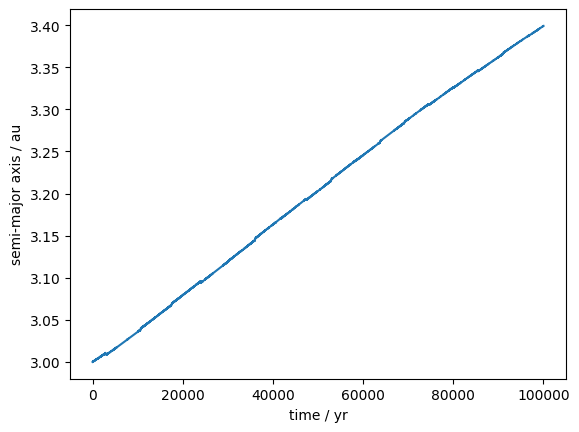

CPU times: user 42.6 s, sys: 11.9 ms, total: 42.6 s
Wall time: 42.6 s


In [22]:
%%time
for i, t in enumerate(times):       # loop through times
  sim.integrate(t) # advance sim to next output time
  #sim.status()
  #ps[0].m = starmass.interpolate(rebx, t) # interpolate & update Sun's mass
  ps[0].m = m1_interp[i]
  ps[1].m = m2_interp[i]
  ps[1].a = a_interp[i]
  a_e[i] = ps[2].a                    # store Earth's current semi-major axis
sim.status()
plt.plot(times, a_e)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.2, 4)
plt.show()

---------------------------------
REBOUND version:     	3.25.1
REBOUND built on:    	Jul  3 2023 09:34:38
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	1.0000000000000000e+05
Current timestep:    	0.001546
---------------------------------
<rebound.particle.Particle object at 0x7fc3887cd560, m=0.9936509700146923 x=-66.38931717580954 y=-132.62907348171734 z=0.0 vx=-13.119990504280159 vy=16.07393885061246 vz=0.0>
<rebound.particle.Particle object at 0x7fc38b0645f0, m=1.8111917980968768 x=-66.47239814372354 y=-132.696884088088 z=0.0 vx=7.197453689918005 vy=-8.822119418025004 vz=0.0>
<rebound.particle.Particle object at 0x7fc3887cd560, m=0.0 x=-68.37690742054498 y=-129.87827547642465 z=0.0 vx=-4.69417437662513 vy=-3.2512784218571222 vz=0.0>
---------------------------------


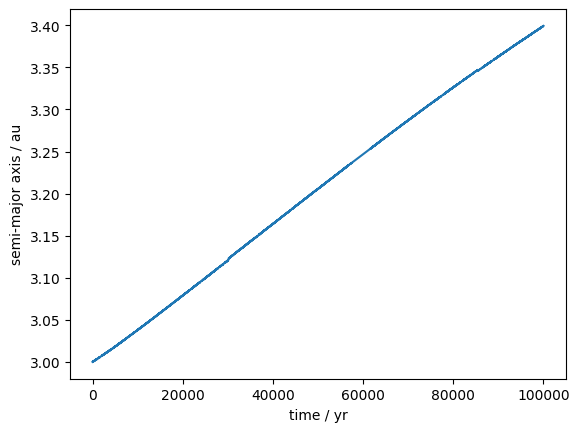

CPU times: user 51.4 s, sys: 96 ms, total: 51.5 s
Wall time: 51.5 s


In [35]:
%%time
for i, t in enumerate(times):       # loop through times
  sim.integrate(t) # advance sim to next output time
  #sim.status()
  #ps[0].m = starmass.interpolate(rebx, t) # interpolate & update Sun's mass
  ps[0].m = m1_interp[i]
  ps[1].m = m2_interp[i]
  ps[1].a = a_interp[i]
  a_e[i] = ps[2].a                    # store Earth's current semi-major axis
sim.status()
plt.plot(times, a_e)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.2, 4)
plt.show()

In [126]:
#for comparison
data = np.loadtxt('m.txt') # return (N, 2) array
age = data[:, 0]        # return only 1st col
masses = data[:, 1]        # return only 2nd col
data = np.loadtxt('r.txt')
Rsuns = data[:, 1] 
m1 = interp.interp1d(age,masses)
r1 = interp.interp1d(age,Rsuns)

In [127]:
M0 = 0.8645388227818771 # initial mass of star
R0 = 0.3833838293200158 # initial radius of star

def makesim():
  sim = rebound.Simulation()        # create simulation object
  sim.units = ('yr', 'AU', 'Msun')  # set sim units
  sim.add(m=M0, r=R0, hash='Star')
  sim.add(a=1., hash='Earth')
  sim.integrator = 'whfast'#whfast    ,ias15     # set integrator
  sim.collision = 'direct'         # check if RGB Sun engulfs Earth
  sim.dt = 0.1*sim.particles[1].P
  return sim

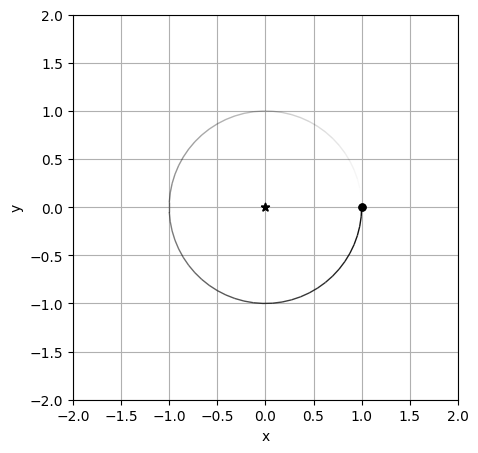

In [128]:


%matplotlib inline
sim = makesim()
ps = sim.particles
op = rebound.OrbitPlot(sim)
op.ax.set_xlim([-2,2])
op.ax.set_ylim([-2,2])
op.ax.grid()



In [ ]:
%%time
Nout = 1000
mass = np.zeros(Nout)
radius = np.zeros(Nout)
a = np.zeros(Nout)
ts = np.linspace(0., 4.e6, Nout)
T0 = 1.23895e10 # Sun's age at simulation start
m1_interp = m1(ts+T0)
r1_interp = r1(ts+T0)* 0.00465047
for i, time in enumerate(ts):
    sim.integrate(time)
    #sim.status()
    ps[0].m = m1_interp[i]
    ps[0].r = r1_interp[i]
    sim.move_to_com() # lost mass had momentum, so need to move back to COM frame
    mass[i] = sim.particles[0].m
    radius[i] = sim.particles[0].r
    a[i] = sim.particles[1].a
    
op = rebound.OrbitPlot(sim)
op.ax.set_xlim([-2,2])
op.ax.set_ylim([-2,2])
op.ax.grid()


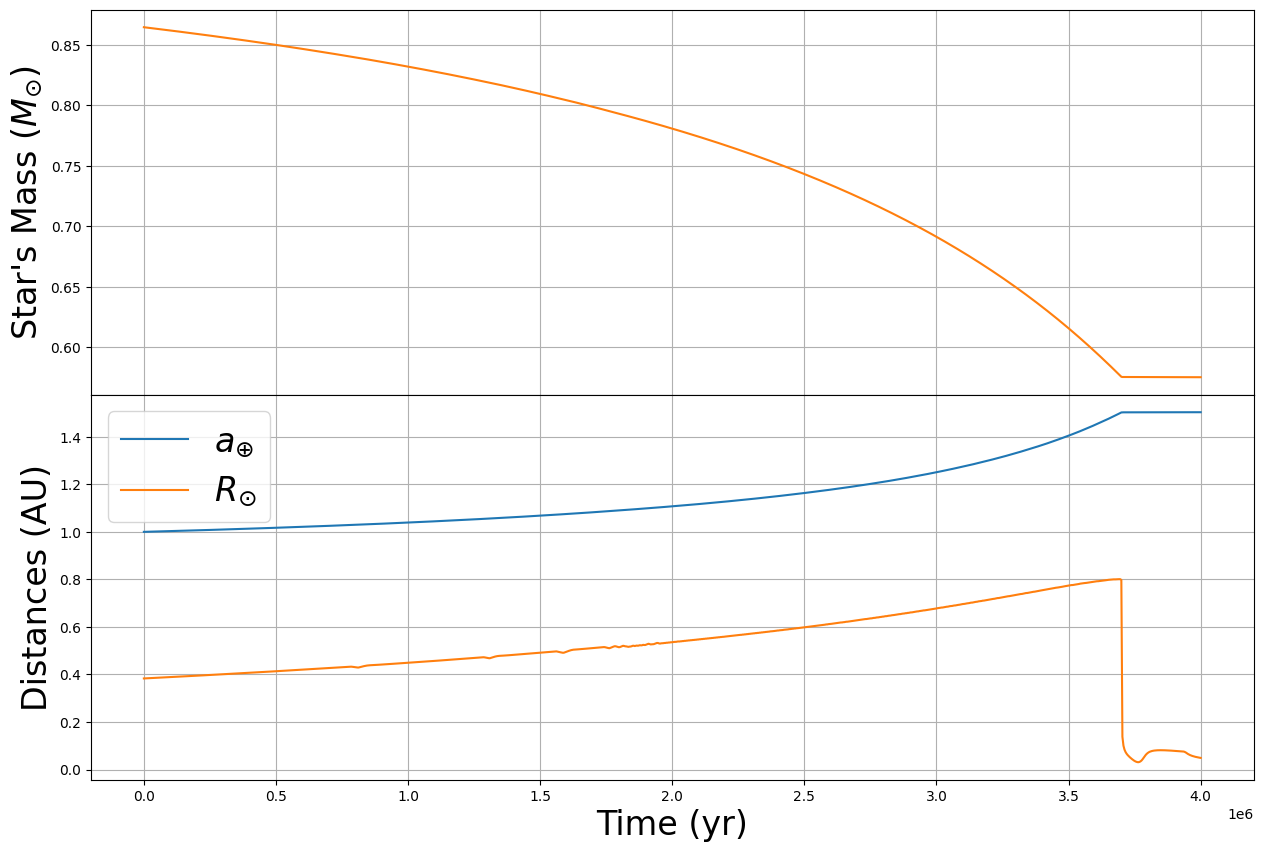

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,10))
fig.subplots_adjust(hspace=0)
ax1.set_ylabel("Star's Mass ($M_{\odot}$)", fontsize=24)
ax1.plot(ts,mass, color='tab:orange')
ax1.grid()
ax2.set_xlabel('Time (yr)', fontsize=24)
ax2.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax2.set_ylabel('Distances (AU)', fontsize=24)
ax2.plot(ts,a, label='$a_{\oplus}$')
ax2.plot(ts,radius, label='$R_{\odot}$')
ax2.legend(fontsize=24, loc='best')
ax2.grid();


In [249]:
import numpy as np

data = np.loadtxt('m.txt') # return (N, 2) array
mtimes = data[:, 0]        # return only 1st col
masses = data[:, 1]        # return only 2nd col

data = np.loadtxt('r.txt')
rtimes = data[:, 0]
Rsuns = data[:, 1]         # data in Rsun units

# convert Rsun to AU
radii = np.zeros(Rsuns.size)
for i, r in enumerate(Rsuns):
    radii[i] = r * 0.00465047

In [250]:


import rebound
import reboundx

M0 = 0.8645388227818771 # initial mass of star
R0 = 0.3833838293200158 # initial radius of star

def makesim():
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2               # use units of AU, yrs and solar masses
    sim.add(m=M0, r=R0, hash='Star')
    sim.add(a=1., hash='Earth')
    sim.collision = 'direct'         # check if RGB Sun engulfs Earth
    sim.integrator = 'whfast'
    #sim.dt = 0.1*sim.particles[1].P
    sim.dt = 0.001
    sim.move_to_com()
    return sim



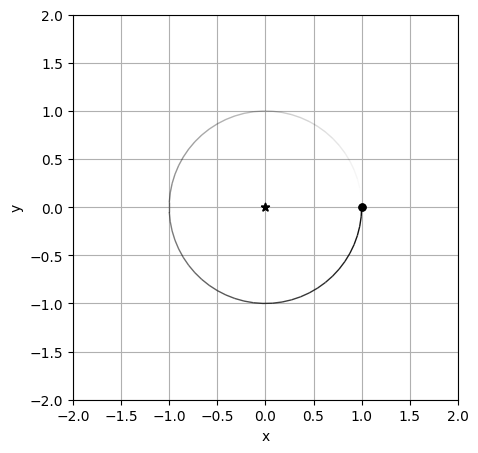

In [251]:


%matplotlib inline
sim = makesim()
ps = sim.particles
op = rebound.OrbitPlot(sim)
op.ax.set_xlim([-2,2])
op.ax.set_ylim([-2,2])
op.ax.grid()



In [252]:
rebx = reboundx.Extras(sim)
starmass = reboundx.Interpolator(rebx, mtimes, masses, 'spline')
starradius = reboundx.Interpolator(rebx, mtimes, radii, 'spline')


In [ ]:
%%time
Nout = 1000
mass = np.zeros(Nout)
radius = np.zeros(Nout)
a = np.zeros(Nout)
ts = np.linspace(0., 4.e6, Nout)
T0 = 1.23895e10 # Sun's age at simulation start

for i, time in enumerate(ts):
    sim.integrate(time)
    sim.status()
    ps[0].m = starmass.interpolate(rebx, t=T0+sim.t)
    ps[0].r = starradius.interpolate(rebx, t=T0+sim.t)
    sim.move_to_com() # lost mass had momentum, so need to move back to COM frame
    mass[i] = sim.particles[0].m
    radius[i] = sim.particles[0].r
    a[i] = sim.particles[1].a
    
op = rebound.OrbitPlot(sim)
op.ax.set_xlim([-2,2])
op.ax.set_ylim([-2,2])
op.ax.grid()

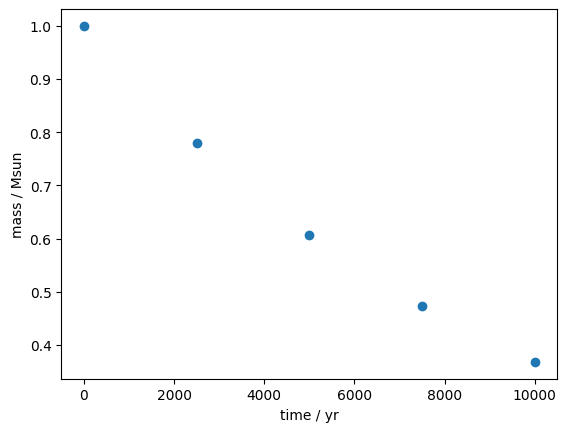

In [9]:
mtimes = np.asarray([0, 2500, 5000, 7500, 10000])      # define time series
masses = np.asarray([1., 0.77880078307, 0.60653065971, # series of masses
                     0.47236655274, 0.36787944117])
rebx = reboundx.Extras(sim)                            # attach REBOUNDx to sim
starmass = reboundx.Interpolator(rebx, mtimes, masses, # create interp. obj.
                                 'spline')

plt.plot(mtimes, masses, 'o')                          # plot mass loss data
plt.xlabel('time / yr')
plt.ylabel('mass / Msun')
plt.show()

    

In [13]:
starmass.interpolate(rebx, 2000)

0.8198973670271371

In [14]:
rebx

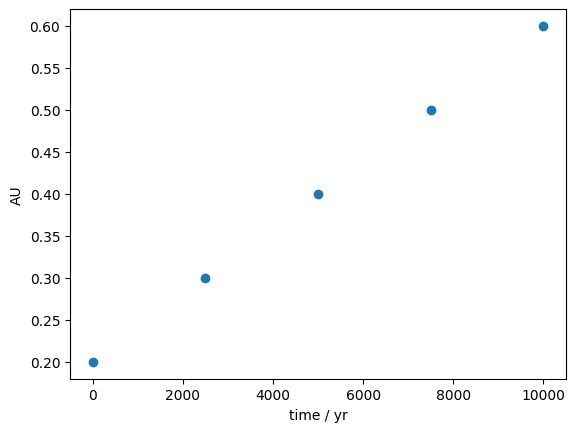

In [10]:
mtimes = np.asarray([0, 2500, 5000, 7500, 10000])      # define time series
anew = np.asarray([0.2, 0.3, 0.4, # series of masses
                     0.5, 0.60])
rebx = reboundx.Extras(sim)                            # attach REBOUNDx to sim
stara = reboundx.Interpolator(rebx, mtimes, anew, # create interp. obj.
                                 'spline')

plt.plot(mtimes, anew, 'o')                          # plot mass loss data
plt.xlabel('time / yr')
plt.ylabel('AU')
plt.show()

    

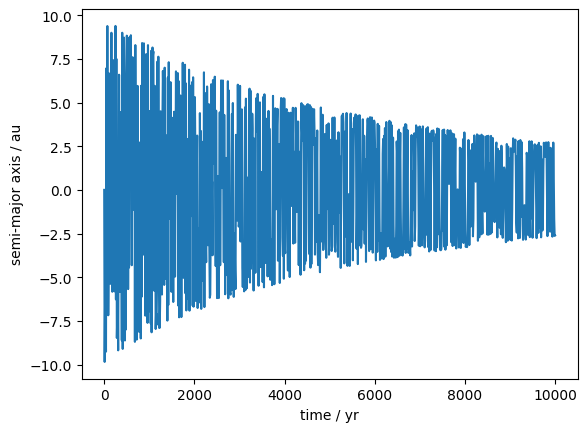

In [65]:
sim = makesim()
ps = sim.particles                  # retrieve array of particle objects
Nout = 1000                         # set total # of outputs
times = np.linspace(0, 1e4, Nout)   # Nout evenly spaced intervals from 0 to 10K
a = np.zeros(Nout)    
E0 = sim.energy()# array for Earth's semi-major axis
sim.ri_whfast.safe_mode = 0
for i, t in enumerate(times):       # loop through times
  sim.integrate(t)                  # advance sim to next output time
  ps[0].m = starmass.interpolate(rebx, t)
  ps[1].a = stara.interpolate(rebx, t)
  a[i] = ps[1].vx                   # store Earth's current semi-major axis

plt.plot(times, a)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.5, 3.)
plt.show()

In [7]:
def integrate_mod(sim, t_final):
    while sim.t < t_final:
        sim.step()
        #sim.integrator_synchronize()
        sim.particles[1].a = stara.interpolate(rebx, t_final)
        sim.ri_whfast.recalculate_coordinates_this_timestep = 1
    #sim.integrator_synchronize()

In [ ]:
sim = makesim()
ps = sim.particles                  # retrieve array of particle objects
Nout = 1000                         # set total # of outputs
times = np.linspace(0, 1e4, Nout)   # Nout evenly spaced intervals from 0 to 10K
a = np.zeros(Nout)    
E0 = sim.energy()# array for Earth's semi-major axis
sim.ri_whfast.safe_mode = 0
for i, t in enumerate(times):       # loop through times
  integrate_mod(sim,t) 
  sim.status()
  ps[0].m = starmass.interpolate(rebx, t)
  #ps[1].a = stara.interpolate(rebx, t)
  #sim.ri_whfast.recalculate_coordinates_this_timestep = 1
  a[i] = ps[1].vx                  # store Earth's current semi-major axis

plt.plot(times, a)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.5, 3.)
plt.show()

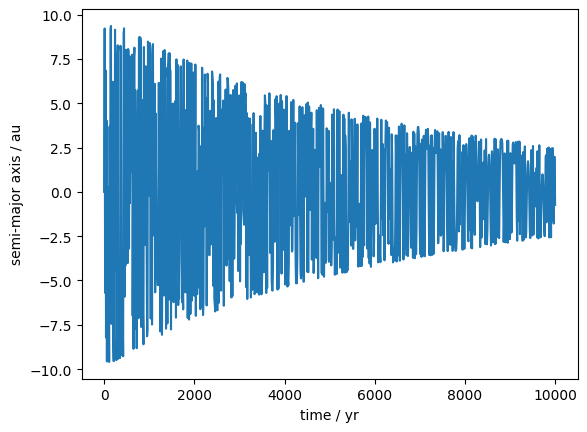

In [74]:
sim = makesim()
ps = sim.particles                  # retrieve array of particle objects
Nout = 1000                         # set total # of outputs
times = np.linspace(0, 1e4, Nout)   # Nout evenly spaced intervals from 0 to 10K
a = np.zeros(Nout)    
E0 = sim.energy()# array for Earth's semi-major axis
sim.ri_whfast.safe_mode = 0
for i, t in enumerate(times):       # loop through times
  integrate_mod(sim,t) 
  ps[0].m = starmass.interpolate(rebx, t)
  #ps[1].a = stara.interpolate(rebx, t)
  #sim.ri_whfast.recalculate_coordinates_this_timestep = 1
  a[i] = ps[1].vx                  # store Earth's current semi-major axis

plt.plot(times, a)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.5, 3.)
plt.show()

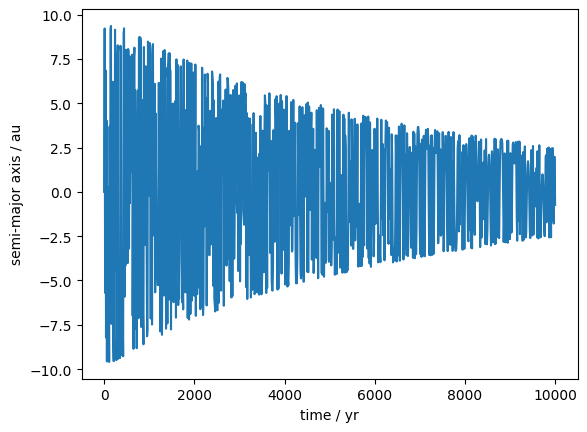

In [76]:
sim = makesim()
ps = sim.particles                  # retrieve array of particle objects
Nout = 1000                         # set total # of outputs
times = np.linspace(0, 1e4, Nout)   # Nout evenly spaced intervals from 0 to 10K
a = np.zeros(Nout)    
E0 = sim.energy()# array for Earth's semi-major axis
for i, t in enumerate(times):       # loop through times
  integrate_mod(sim,t) 
  ps[0].m = starmass.interpolate(rebx, t)
  #ps[1].a = stara.interpolate(rebx, t)
  #sim.ri_whfast.recalculate_coordinates_this_timestep = 1
  a[i] = ps[1].vx                  # store Earth's current semi-major axis

plt.plot(times, a)                  # plot Earth's semi-major axis vs. time
plt.xlabel('time / yr')
plt.ylabel('semi-major axis / au')
#plt.ylim(0.5, 3.)
plt.show()

In [79]:

sim.integrate(1e4)
dE = abs((sim.energy() - E0)/E0)
print(dE)



0.7372620660358628


In [14]:
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:


sim = rebound.Simulation()
# Star
ms = 1

rs = 0.00465
sim.add(m = ms, r = rs)

# Planet
mp = 9.55e-4
rp = 4.676e-4#4.676e-4
ap = 0.04072
ep = 0.01
sim.add(m = mp, r = rp, a = ap, e = ep)
ps = sim.particles



In [16]:
rebx = reboundx.Extras(sim)
sf = rebx.load_force("tides_spin")
rebx.add_force(sf)

# Star parameters
ps[0].params['k2'] = 0.07
ps[0].params['I'] = 0.07 * ms * rs**2 # if m=0, the effect interprets 'I' as I/m, so we could set ...['I'] = 0.07*rs**2

# Planet parameters
ps[1].params['k2'] = 0.3#0.3
ps[1].params['I'] = 0.25 * mp * rp**2

In [17]:
spin_period_star = (27 / 365) * 2 * np.pi # 27 days in default REBOUND units
spin_mag_star = 2 * np.pi / spin_period_star
obliquity_star = 0
phase_star = 0

# The convenience function
ps[0].params['Omega'] = rebound.spherical_to_xyz(magnitude=spin_mag_star, theta=obliquity_star, phi=phase_star)

# To set the spin vector directly in Cartesian coordinates. Both approaches are equivalent
# ps[0].params['Omega'] = [spin_mag_star * np.sin(obliquity_star) * np.cos(phase_star),
# spin_mag_star * np.sin(obliquity_star) * np.sin(phase_star), spin_mag_star * np.cos(obliquity_star)] 

# Planet's spin axis
spin_period_planet = (0.5 / 365) * 2 * np.pi # 0.5 days in default REBOUND units
spin_mag_planet = 2 * np.pi / spin_period_planet
obliquity_planet = np.radians(30.0)
phase_planet = 0

ps[1].params['Omega'] = rebound.spherical_to_xyz(magnitude=spin_mag_planet, theta=obliquity_planet, phi=phase_planet)

In [18]:


stellar_Q = 1e6
#planet_Q = 1e4

ps[0].params['tau'] = 1 / (2 * stellar_Q * ps[1].n)
#ps[1].params['tau'] = 1 / (2 * planet_Q * ps[1].n)




In [19]:
sim.integrator = "whfast"
sim.dt = sim.particles[1].P/10.1234567 # timestep is a fraction of the orbital period
sim.move_to_com() # Moving to CoM

Ltot = np.array(sim.angular_momentum()) + np.array(rebx.spin_angular_momentum())
rot = rebound.Rotation.to_new_axes(newz=Ltot) # Alignment to invariant plane
rebx.rotate_simulation(rot)

In [20]:
rebx.initialize_spin_ode(sf)

In [21]:
%%time
tmax = 2 * np.pi * 1e4
Nout = 1000
times = np.linspace(0, tmax, Nout)

planet_a = np.zeros(Nout)
planet_e = np.zeros(Nout)

planet_spin_mag = np.zeros(Nout)
planet_obliquity = np.zeros(Nout)
planet_phase = np.zeros(Nout)

for i, t in enumerate(times):
    # Orbital elements
    planet_a[i] = ps[1].a
    planet_e[i] = ps[1].e
    
    # Spin Axis
    planet_spin_axis_inv = ps[1].params['Omega'] # Initially invarant frame
    
    planet_orbit_normal = ps[1].hvec
    rot_to_orbit_frame = rebound.Rotation.to_new_axes(newz=planet_orbit_normal)
    planet_spin_axis_orb = rot_to_orbit_frame * planet_spin_axis_inv # Now in the planet frame
    
    # We can interpret the spin axis in the more natural spherical coordinates
    mag, obliquity, phase = rebound.xyz_to_spherical(planet_spin_axis_orb)
    
    planet_spin_mag[i] = mag
    planet_obliquity[i] = np.degrees(obliquity)
    planet_phase[i] = np.degrees(phase)
    
    sim.integrate(t)

CPU times: user 21.4 s, sys: 0 ns, total: 21.4 s
Wall time: 21.4 s


In [10]:
from scipy.integrate import odeint

def leconte_analytic(params, t, mstar, rstar, k2_star, dt_star, C_s, mp, rp, k2_p, dt_p, C_p):
    '''
    Leconte 2010 Eq (2, 6, 10)
    Assumes REBOUND units (G=1)
    '''
    
    a, e, omega_p, omega_s, ep_p, ep_s = params
    n = np.sqrt((mstar + mp) / a**3)
    
    n_e = (1 + (15 / 2) * e**2 + (45 / 8) * e**4 + (5 / 16) * e**6) / (1 - e**2)**6
    n_a_e = (1 + (31 / 2) * e**2 + (255 / 8) * e**4 + (185 / 16) * e**6 + (25 / 64) * e**8) / (1 -  e**2)**(15 / 2)
    n_e_e = (1 + (15 / 4) * e**2 + (15 / 8) * e**4 + (5 / 64) * e**6) / (1 - e**2)**(13 / 2)
    omega_e_e = (1 + (3 / 2) * e**2 + (1 / 8) * e**4) / (1 - e**2)**5
    omega_e = (1 + 3 * e**2 + (3 / 8) * e**4) / (1 - e**2)**(9 / 2)
    
    Kp = 3 * k2_p * dt_p * (mp**2 / rp) * (mstar / mp)**2 * (rp / a)**6 * n**2
    Kstar = 3 * k2_star * dt_star * (mstar**2 / rstar) * (mp / mstar)**2 * (rstar / a)**6 * n**2
    
    eta_p = (mp + mstar) / (mp * mstar) * (C_p * omega_p) / (a**2 * n * np.sqrt(1 - e**2))
    eta_s = (mp + mstar) / (mp * mstar) * (C_s * omega_s) / (a**2 * n * np.sqrt(1 - e**2))
    
    da_dt = (4 * a**2 / (mstar * mp)) * (Kp * (n_e * np.cos(ep_p) * omega_p / n - n_a_e)
                                       + Kstar * (n_e * np.cos(ep_s) * omega_s / n - n_a_e))
    
    de_dt = (11 * a * e / (mstar * mp)) * (Kp * (omega_e_e * np.cos(ep_p) * omega_p / n - (18 / 11) * n_e_e)
                                         + Kstar * (omega_e_e * np.cos(ep_s) * omega_s / n - (18 / 11) * n_e_e))
    
    domega_p_dt = -(Kp / (n * C_p)) * ((1 + np.cos(ep_p)**2) * omega_e * omega_p / n - 2 * np.cos(ep_p) * n_e)
    domega_s_dt = -(Kstar / (n * C_s)) * ((1 + np.cos(ep_s)**2) * omega_e * omega_s / n - 2 * np.cos(ep_s) * n_e)
    
    dep_p_dt = np.sin(ep_p) * ((Kp / (n * omega_p * C_p)) * 
                               ((np.cos(ep_p) - eta_p) * omega_e * omega_p / n - 2 * n_e))
    dep_s_dt = np.sin(ep_s) * ((Kstar / (n * omega_s * C_s)) * 
                               ((np.cos(ep_s) - eta_s) * omega_e * omega_s / n - 2 * n_e))
    
    return [da_dt, de_dt, domega_p_dt, domega_s_dt, dep_p_dt, dep_s_dt]

initial_condition = [ap, ep, 365 / 0.5, 365 / 27, np.radians(30.), np.radians(0)]
analytic_solution = odeint(leconte_analytic, initial_condition, times,
                              args=(ms, rs, 0.07, 4.11e-9, 0.07 * ms * rs**2,
                                    mp, rp, 0.3, 4.11e-7, 0.25 * mp * rp**2))


In [11]:
planet_n = np.sqrt((ms + mp) / (planet_a**3))

# Analytic results
planet_lec_a = analytic_solution[:,0]
planet_lec_e = analytic_solution[:,1]
planet_lec_n = np.sqrt((ms + mp) / (planet_lec_a**3))
planet_lec_spin = analytic_solution[:,2]
planet_lec_obliquity = np.degrees(analytic_solution[:,4])

Text(0.5, 0, 'Time (kyr)')

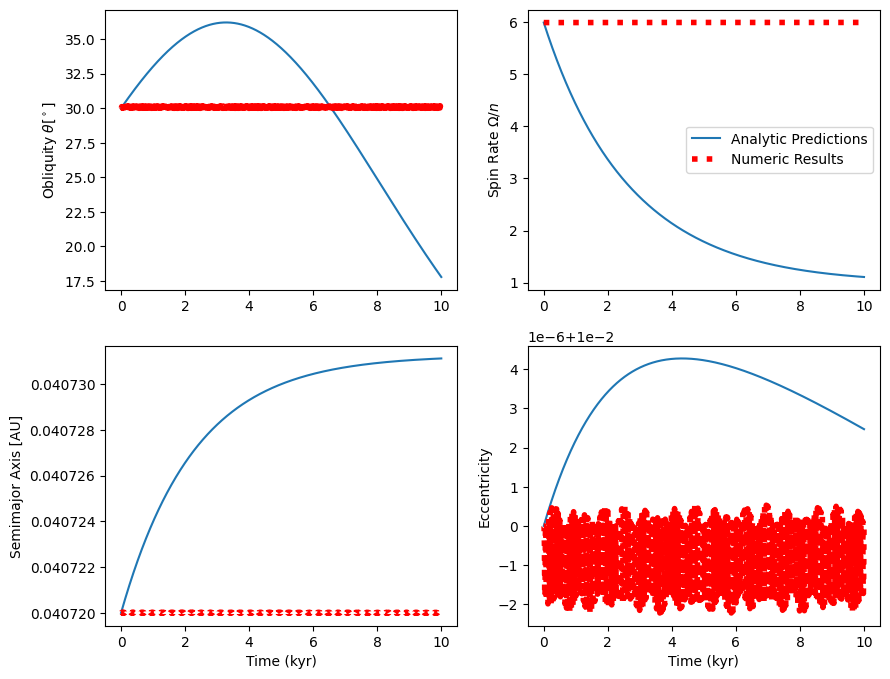

In [22]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()

times_rescaled = times / (1000 * 2 * np.pi) # this converts from REBOUND time units to kyr

ax[0].plot(times_rescaled, planet_lec_obliquity)
ax[0].plot(times_rescaled, planet_obliquity, ls = ':', color = 'red', linewidth=4)
ax[0].set_ylabel(r'Obliquity $\theta [^\circ]$')

ax[1].plot(times_rescaled, planet_lec_spin / planet_lec_n, label = 'Analytic Predictions')
ax[1].plot(times_rescaled, planet_spin_mag / planet_n, ls = ':', color = 'red', lw=4, label='Numeric Results')
ax[1].set_ylabel(r'Spin Rate $\Omega / n$')
ax[1].legend()

ax[2].plot(times_rescaled, planet_lec_a)
ax[2].plot(times_rescaled, planet_a, ls = ':', color = 'red', lw=4)
ax[2].set_ylabel('Semimajor Axis [AU]')
ax[2].set_xlabel('Time (kyr)')

ax[3].plot(times_rescaled, planet_lec_e)
ax[3].plot(times_rescaled, planet_e, ls = ':', color = 'red', lw=4)
ax[3].set_ylabel('Eccentricity')
ax[3].set_xlabel('Time (kyr)')


In [18]:
from astropy import constants as const
from astropy import units as u

In [51]:
import reboundx
import rebound
import mesa_reader as mr
from matplotlib import pyplot as plt
import numpy as np
import scipy.interpolate as interp

msol = 1.9892e33                # solar mass, gravitational not baryonic (g)
rsol = 6.9598e10                # solar radius (cm)
secyer = 3.1558149984e7         # seconds per year
au = 1.495978921e13             # AU in cm
standard_cgrav = 6.67428e-8     # cgs
G = standard_cgrav*msol/au**3*secyer**2 # au,Msun,yr

In [43]:
import reboundx
import rebound
import mesa_reader as mr
from matplotlib import pyplot as plt
import numpy as np
import scipy.interpolate as interp
from astropy import constants as const
from astropy import units as u

In [50]:
msol = const.M_sun.to('g').value
rsol = const.R_sun.to('cm').value
secyer = u.yr.to(u.s)
standard_cgrav = const.G.cgs.value
G = const.G.to('au3/(M_sun yr2)').value

In [52]:
G

39.49385451994166

In [54]:
const.G.to('au3/(M_sun yr2)').value

39.476926408897626

In [48]:
const.G.cgs

<Quantity 6.6743e-08 cm3 / (g s2)>

In [45]:
u.yr.to(u.s)

31557600.0

In [42]:
const.M_sun.to('g').value,const.R_sun.to('cm')

(1.988409870698051e+33, <Quantity 6.957e+10 cm>)

In [ ]:
def read_mesa(mesa_file):
    return mr.MesaData(mesa_file)
def interpolate_mesa_binary_history(key):
    age = b.data('age')
    history = b.data(key)
    history_interp = interp.interp1d(age,history)
    return history_interp
def interpolate_mesa_history(key,idx):
    if idx ==1:
        s =s1
    elif idx ==2:
        s =s2
    star_age = s.data('star_age')
    history = s.data(key)
    history_interp = interp.interp1d(star_age,history)
    return history_interp
    
def fun(data):
    return np.split(data, np.where(np.diff(data) != 1)[0]+1)

def find_mass_trasfer_phase(lg_mdot_benchmark):
    lg_mstar_dot_1 = b.data('lg_mstar_dot_1')
    index_mdot = np.where(lg_mstar_dot_1 > lg_mdot_benchmark)
    index_group = fun(index_mdot[0])
    return index_group

MESA_INPUT_1={
    'm1':'star_1_mass',
    'r1':'star_1_radius',
    'mdot1':'lg_mstar_dot_1'
}
MESA_INPUT_2={
    'm2':'star_2_mass',
    'r2':'star_2_radius',
    'a':'binary_separation'
}
MESA_INPUT  = {**MESA_INPUT_1, **MESA_INPUT_2}

MESA_INPUT_PRIMARY={
    'M_pri':'star_mass',
    'log_R_pri':'log_R',
    'W_pri':'surf_avg_omega',
    'log_L_pri':'log_total_angular_momentum',
    'I_pri':'total_moment_of_inertia',
    'M_env_pri':'mass_conv_reg_fortides',
    'DR_env_pri':'thickness_conv_reg_fortides',
    'Renv_middle_pri':'radius_conv_reg_fortides',
    'log_Lum_pri':'log_L',
    'conv_mx1_top_r_pri':'conv_mx1_top_r',
    'conv_mx1_bot_r_pri':'conv_mx1_bot_r',
    'surface_h1_pri':'surface_h1',
    
}
MESA_INPUT_SECONDARY={
    'M_sec':'star_mass',
    'log_R_sec':'log_R',
    'W_sec':'surf_avg_omega',
    'log_L_sec':'log_total_angular_momentum',
    'I_sec':'total_moment_of_inertia',
    'M_env_sec':'mass_conv_reg_fortides',
    'DR_env_sec':'thickness_conv_reg_fortides',
    'Renv_middle_sec':'radius_conv_reg_fortides',
    'log_Lum_sec':'log_L',
    'conv_mx1_top_r_sec':'conv_mx1_top_r',
    'conv_mx1_bot_r_sec':'conv_mx1_bot_r',
    'surface_h1_sec':'surface_h1',
}


    
binary_file = './binary_history.data'
singe_file1 = './star1.data'
singe_file2 = './star2.data'
b = read_mesa(binary_file)
age = b.data('age')
s1 = read_mesa(singe_file1)
s2 = read_mesa(singe_file2)
for key in MESA_INPUT:
    locals()[key] = interpolate_mesa_binary_history(MESA_INPUT[key])
for key in MESA_INPUT_PRIMARY:
    locals()[key] = interpolate_mesa_history(MESA_INPUT_PRIMARY[key],1)
for key in MESA_INPUT_SECONDARY:
    locals()[key] = interpolate_mesa_history(MESA_INPUT_SECONDARY[key],2)
    
MT_interval = find_mass_trasfer_phase(-6)

t1 = age[MT_interval[0][0]]-5e6
t2 = age[MT_interval[1][-1]]+1e8

def time_mesa(t1,t2):
    x1 = np.searchsorted(age, t1)
    x2 = np.searchsorted(age, t2)-1
    times = age[np.arange(x1,x2)]
    if t1 != age[x1]:
        times = np.insert(times, 0, t1)
    if t2 != age[x2]:
        times = np.insert(times, len(times), t2)
    return times
def time_update_mesa(times, key, detalmin):
    t = []
    if key not in MESA_INPUT:
        raise Exception('key not in MESA_INPUT')
    arr = interpolate_mesa_binary_history(MESA_INPUT[key])(times)
    for i in range(len(times) - 1):
        if arr[i]-arr[i+1]> detalmin:
            n = int((arr[i]-arr[i+1])/detalmin + 2)
            t.extend(np.linspace(times[i],times[i+1],n).tolist()[:-1])
        else:
            t.append(times[i])
    t.append(times[-1])
    return np.array(t)
    
times = time_mesa(t1,t2)
times = time_update_mesa(times,'m1',1e-5)

# interpolate kaps calculated with density profiles
kaps_pri_data = np.loadtxt('kaps_pri.csv')
kaps_pri_time = np.loadtxt('kaps_pri_time.csv')
kaps_pri = interp.interp1d(kaps_pri_time, kaps_pri_data, kind="linear")
kaps_sec_data = np.loadtxt('kaps_sec.csv')
kaps_sec_time = np.loadtxt('kaps_sec_time.csv')
kaps_sec = interp.interp1d(kaps_sec_time, kaps_sec_data, kind="linear")

def run_rebound_mesa_timestep_with_tides(times, ap_initial,ep_initial,inc_initial,integrator):
    t_initial =  times[0]
    M_pri_initial = M_pri(t_initial) #Msun
    M_sec_initial = M_sec(t_initial) 
    R_pri_initial = 10**log_R_pri(t_initial)*rsol/au #au
    R_sec_initial = 10**log_R_sec(t_initial)*rsol/au
    a_initial= a(t_initial) *rsol/au #au
    I_pri_initial = I_pri(t_initial)/msol/au**2 
    I_sec_initial = I_sec(t_initial)/msol/au**2
    W_pri_initial = 10**log_L_pri(t_initial)/I_pri(t_initial)*secyer #yr-1
    W_sec_initial = 10**log_L_sec(t_initial)/I_sec(t_initial)*secyer
    kaps_pri_initial = kaps_pri(t_initial)
    kaps_sec_initial = kaps_sec(t_initial)
    
    ap_initial = ap_initial
    
    def makesim():
        sim = rebound.Simulation()
        sim.units = ('yr', 'AU', 'Msun') 
        sim.add(m=M_pri_initial,r=R_pri_initial)      
        sim.add(m=M_sec_initial,r=R_sec_initial,a=a_initial)
        sim.add(a=ap_initial,e=ep_initial,inc =inc_initial, m=1e-3, r=5e-4)

        sim.integrator = integrator #"ias15"#"mercurius"
        sim.move_to_com()
        return sim
    sim = makesim()
    ps = sim.particles
    rebx = reboundx.Extras(sim)
    sf = rebx.load_force("tides_spin")
    rebx.add_force(sf)
    ps[0].params['Omega'] = rebound.spherical_to_xyz(magnitude=W_pri_initial, theta=0, phi=0)
    ps[0].params['I'] = I_pri_initial
    ps[1].params['Omega'] = rebound.spherical_to_xyz(magnitude=W_sec_initial, theta=0, phi=0)
    ps[1].params['I'] = I_sec_initial
    ps[2].params['Omega'] = rebound.spherical_to_xyz(magnitude=2*np.pi/(ps[2].P), theta=0, phi=0)
    ps[2].params['I'] = 0.25 * ps[2].m * ps[2].r**2
    
    ps[0].params['k2'] = 2*kaps_pri_initial
    ps[1].params['k2'] = 2*kaps_sec_initial
    ps[2].params['k2'] = 0.565
    
    
    def calculate_kt_conv(M_env,DR_env,Renv_middle,Lum,W,M,n):
        # calculate k/T
        tau_conv = 0.431 * ((M_env * DR_env * Renv_middle/ (3 * Lum)) ** (1.0 / 3.0))
        P_spin = 2 * np.pi / W  # yr
        P_orb = 2 * np.pi / n   # yr
        P_tid = np.abs(1 / (1 / P_orb - 1 / P_spin))   
        f_conv = np.min([1, (P_tid / (2 * tau_conv)) ** 2])
        kT_conv = ((2. / 21) * (f_conv / tau_conv) * (M_env / M)) # yr-1
        return kT_conv
    kT_conv_pri_initial = calculate_kt_conv(M_env_pri(t_initial),DR_env_pri(t_initial),
                                           Renv_middle_pri(t_initial),10**log_Lum_pri(t_initial),
                                           W_pri_initial,M_pri_initial,ps[2].n)
    kT_conv_sec_initial = calculate_kt_conv(M_env_sec(t_initial),DR_env_sec(t_initial),
                                           Renv_middle_sec(t_initial),10**log_Lum_sec(t_initial),
                                           W_sec_initial,M_sec_initial,ps[2].n)
    
    
    ps[0].params['tau'] = kT_conv_pri_initial/ps[0].params['k2']*(R_pri_initial)**3/G/M_pri_initial
    ps[1].params['tau'] = kT_conv_sec_initial/ps[1].params['k2']*(R_sec_initial)**3/G/M_sec_initial
    Q = 1e4
    ps[2].params['tau'] = 1/(2*Q*ps[2].n)

    rebx.initialize_spin_ode(sf)






    time_interval = times-t_initial
    M_pri_interp = M_pri(times)
    M_sec_interp = M_sec(times)
    a_interp = a(times) *rsol/au
    R_pri_interp = 10**log_R_pri(times)*rsol/au
    R_sec_interp = 10**log_R_sec(times)*rsol/au
    I_pri_interp = I_pri(times)/msol/au**2
    I_sec_interp = I_sec(times)/msol/au**2
    W_pri_interp = 10**log_L_pri(times)/I_pri(times)*secyer #yr-1
    W_sec_interp = 10**log_L_sec(times)/I_sec(times)*secyer
    
    # variables to calculate k/T
    M_env_pri_interp = M_env_pri(times)
    M_env_sec_interp = M_env_sec(times)
    DR_env_pri_interp = DR_env_pri(times)
    DR_env_sec_interp = DR_env_sec(times)
    Renv_middle_pri_interp = Renv_middle_pri(times)
    Renv_middle_sec_interp = Renv_middle_sec(times)
    log_Lum_pri_interp = log_Lum_pri(times)
    log_Lum_sec_interp = log_Lum_sec(times)
    
    kaps_pri_interp = kaps_pri(times)
    kaps_sec_interp = kaps_sec(times)
    
    Nout = len(time_interval)
    a_p = np.zeros(Nout)
    e_p = np.zeros(Nout)
    inc_p = np.zeros(Nout)
    x_p = np.zeros(Nout)
    y_p = np.zeros(Nout)
    z_p = np.zeros(Nout)
    #o1 = np.zeros((Nout, 3))
    #o2 = np.zeros((Nout, 3))
    o3 = np.zeros((Nout, 3))
    for i, t in enumerate(time_interval):

        sim.integrate(t)

        #sim.status()
        ps[0].m = M_pri_interp[i]
        ps[0].r = R_pri_interp[i]
        ps[0].params['I'] = I_pri_interp[i]
        ps[0].params['Omega'] = rebound.spherical_to_xyz(magnitude=W_pri_interp[i], theta=0, phi=0)
        ps[1].m = M_sec_interp[i]
        ps[1].r = R_sec_interp[i]
        ps[1].params['I'] = I_sec_interp[i]
        ps[1].params['Omega'] = rebound.spherical_to_xyz(magnitude=W_sec_interp[i], theta=0, phi=0)
        ps[1].a = a_interp[i]
        
        kT_conv_pri = calculate_kt_conv(M_env_pri_interp[i],DR_env_pri_interp[i],
                                           Renv_middle_pri_interp[i],10**log_Lum_pri_interp[i],
                                           W_pri_interp[i],M_pri_interp[i],ps[2].n)
        kT_conv_sec = calculate_kt_conv(M_env_sec_interp[i],DR_env_sec_interp[i],
                                           Renv_middle_sec_interp[i],10**log_Lum_sec_interp[i],
                                           W_sec_interp[i],M_sec_interp[i],ps[2].n)
        ps[0].params['tau'] = kT_conv_pri/kaps_pri_interp[i]*(R_pri_interp[i])**3/G/M_pri_interp[i]
        ps[1].params['tau'] = kT_conv_sec/kaps_sec_interp[i]*(R_sec_interp[i])**3/G/M_sec_interp[i]
        ps[2].params['tau'] = 1/(2*Q*ps[2].n)
        ps[0].params['k2'] = 2*kaps_pri_interp[i]
        ps[1].params['k2'] = 2*kaps_sec_interp[i]
       
        
        a_p[i] = ps[2].a
        e_p[i] = ps[2].e
        inc_p[i] = ps[2].inc
        o3[i] = ps[2].params['Omega']
        x_p[i] = ps[2].x
        y_p[i] = ps[2].y
        z_p[i] = ps[2].z
    return a_p,e_p,inc_p,times,x_p,y_p,z_p,o3





result1 = run_rebound_mesa_timestep_with_tides(times,0.5,0.0,0.0,'whfast')


def write_arrays_to_csv(filename, array_groups, names):
    with open(filename, 'w') as file:
        # Write the names on the first line
        name_line = ','.join(names)  
        file.write(name_line + '\n')
        
        # Write the array groups
        for group in array_groups:
            array1, array2, array3, array4,array5,array6,array7,array8 = group
            rows = np.vstack((array1, array2,array3,array4,array5,array6,array7,array8)).T
            np.savetxt(file, rows, delimiter=',')

array_groups = [(result1[0], result1[1],result1[2],result1[3],result1[4],result1[5],result1[6],result1[7].T[2])]
names = ['ap','ep', 'incp', 'time','x','y','z','omega']

write_arrays_to_csv('1e-5_0.5_long_tides.csv', array_groups, names)